In [40]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import rdRGroupDecomposition as rdRGD
from rdkit.SimDivFilters import rdSimDivPickers
from rdkit.Chem import Draw, rdMolDescriptors, AllChem
from rdkit import DataStructs
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# Read in the CSV file
file_name = 'data/r_groups_pIC50.csv'
data = pd.read_csv(file_name, delimiter=',')
data.head(2)

,Unnamed: 0,Core,Atag,R1,Btag,R2,pIC50
0,0,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B01,c1ccc([*:2])cc1,6.5
1,1,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B02,Brc1ccc([*:2])cc1,6.8


,Unnamed: 0,Core,Atag,R1,Btag,R2,pIC50,R2 mols
0,0,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B01,c1ccc([*:2])cc1,6.5,
1,1,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B02,Brc1ccc([*:2])cc1,6.8,

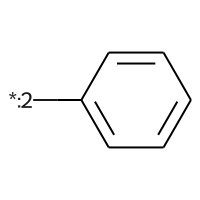
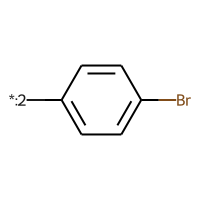

In [42]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='R2', molCol='R2 mols')
data.head(2)

In [45]:
# Convert r2 groups into Morgan fingerprint
r2_fps = [Chem.AllChem.GetMorganFingerprintAsBitVect(x, 2) for x in data['R2 mols']]

# Use the MaxMin algorithm which select a diverse subset of 10 molecules
picker = rdSimDivPickers.MaxMinPicker()
picks = list(picker.LazyBitVectorPick(r2_fps, len(r2_fps), 10))

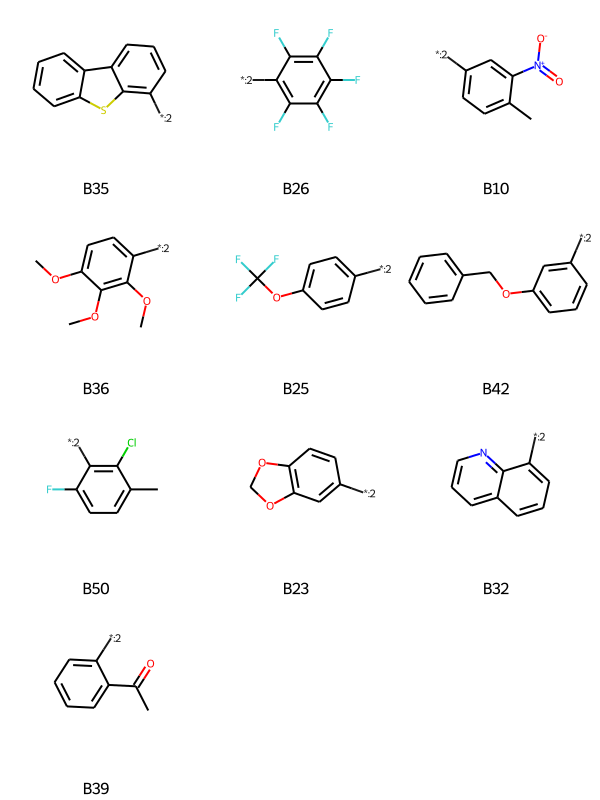

In [49]:
# Display molecule subset with Btag label
Draw.MolsToGridImage(data['R2 mols'][picks], legends=list(data['Btag'][picks]))

In [50]:
from rdkit.ML.Cluster import Butina
dists = []
for i in range(1, len(r2_fps)):
    sims = DataStructs.BulkTanimotoSimilarity(r2_fps[i], r2_fps[:i])
    dists.extend(1 - x for x in sims)

# execute clustering
threshold = 0.3
cs = Butina.ClusterData(dists, r2_fps, distThresh=threshold, isDistData=True)
print('Number of clusters: ', len(cs))

TypeError: unsupported operand type(s) for -: 'list' and 'int'